In [1]:
from datetime import datetime, timedelta

In [2]:
#Arbitrary date
print('Arbitrary Day: ', end = ' ')
print(datetime(year = 2021, month = 12, day = 23))

Arbitrary Day:  2021-12-23 00:00:00


In [5]:
#Arbitrary date and time
print(datetime(year = 2021, month = 12, day = 23, hour = 13, minute = 40, second = 56))

2021-12-23 13:40:56


In [6]:
#Today's date
print(datetime.now())

2022-01-23 14:13:30.096633


In [7]:
#Yesterday's date
print(datetime.now() - timedelta(days = 1))

2022-01-22 14:14:23.538167


In [8]:
now = datetime.now()
print(now.year, now.month, now.day, now.hour, now.minute, now.second)

2022 1 23 14 18 20


In [9]:
import pandas as pd

In [10]:
date_list = pd.date_range(start = '2022-01-01', end = '2022-01-23')
date_list

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23'],
              dtype='datetime64[ns]', freq='D')

In [12]:
date_list = pd.date_range(start = '2022-01-01', periods = 15, freq = 'D')
date_list

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15'],
              dtype='datetime64[ns]', freq='D')

In [13]:
print(f'Minimum date: {date_list.min()}')
print(f'Maximum date: {date_list.max()}')

Minimum date: 2022-01-01 00:00:00
Maximum date: 2022-01-15 00:00:00


In [14]:
date_list = pd.date_range(start = '2021-01-01', periods = 12, freq = 'M')
date_list

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [18]:
df = pd.read_csv('LTOTALNSA.csv', index_col = 'DATE', parse_dates = True)
df.head()

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1
1976-04-01,1163.2
1976-05-01,1176.1


In [19]:
yearly_totals = df.resample(rule = 'Y').sum()
yearly_totals.head()

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9
1978-12-31,14981.0
1979-12-31,13758.4
1980-12-31,11197.5


In [20]:
quarterly_means = df.resample(rule = 'Q').mean()
quarterly_means.head()

,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667


In [22]:
df_shift = df.copy()
df_shift['Shift_1'] = df_shift['LTOTALNSA'].shift(1)
df_shift['Shift_2'] = df_shift['LTOTALNSA'].shift(2)
df_shift.head()

,LTOTALNSA,Shift_1,Shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


In [23]:
df_shift = df.copy()
df_shift['Neg_Shift_1'] = df_shift['LTOTALNSA'].shift(-1)
df_shift['Neg_Shift_2'] = df_shift['LTOTALNSA'].shift(-2)
df_shift.tail()

,LTOTALNSA,Neg_Shift_1,Neg_Shift_2
DATE,,,
2021-07-01,1280.802,1092.662,1015.939
2021-08-01,1092.662,1015.939,1043.867
2021-09-01,1015.939,1043.867,1000.801
2021-10-01,1043.867,1000.801,NaN
2021-11-01,1000.801,NaN,NaN


In [25]:
df_rolling = df.copy()
df_rolling['Quarterly Rolling'] = df_rolling['LTOTALNSA'].rolling(window = 3).mean()
df_rolling['Yearly Rolling'] = df_rolling['LTOTALNSA'].rolling(window = 12).mean()
df_rolling.head(12)

,LTOTALNSA,Quarterly Rolling,Yearly Rolling
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,NaN,NaN
1976-03-01,1216.1,1018.000000,NaN
1976-04-01,1163.2,1117.533333,NaN
1976-05-01,1176.1,1185.133333,NaN
1976-06-01,1224.9,1188.066667,NaN
1976-07-01,1130.1,1177.033333,NaN
1976-08-01,994.9,1116.633333,NaN
1976-09-01,1024.9,1049.966667,NaN


In [27]:
df_diff = df.copy()
df_diff['Diff_1'] = df_diff['LTOTALNSA'].diff(periods = 1)
df_diff['Diff_2'] = df_diff['LTOTALNSA'].diff(periods = 2)
df_diff.head()

,LTOTALNSA,Diff_1,Diff_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,108.7,NaN
1976-03-01,1216.1,242.8,351.5
1976-04-01,1163.2,-52.9,189.9
1976-05-01,1176.1,12.9,-40.0


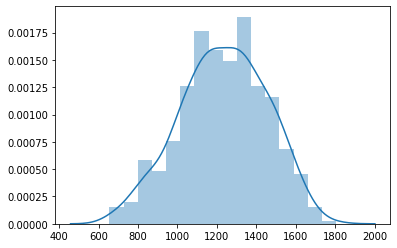

In [31]:
import seaborn as sns
sns.distplot(df)

Text(0.5, 1.0, 'Light weight vehicle sales')

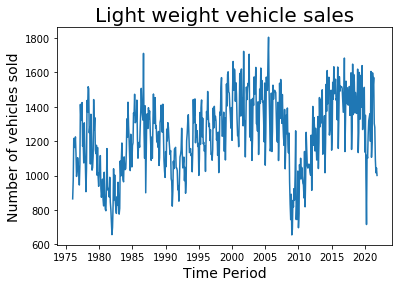

In [37]:
import matplotlib.pyplot as plt
plt.plot(df['LTOTALNSA'])
plt.xlabel('Time Period', size = 14)
plt.ylabel('Number of vehicles sold', size = 14)
plt.title('Light weight vehicle sales', size = 20)

Text(0.5, 1.0, 'Light weight vehicle sales')

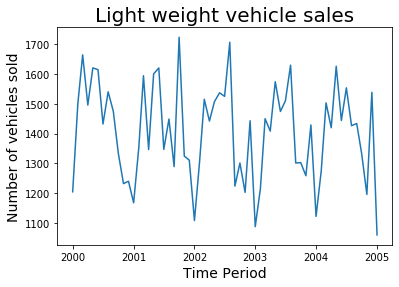

In [39]:
plt.plot(df['LTOTALNSA']['2000-01-01' : '2005-01-01'])
plt.xlabel('Time Period', size = 14)
plt.ylabel('Number of vehicles sold', size = 14)
plt.title('Light weight vehicle sales', size = 20)